In [2]:
# Import necessary libraries
import sys
sys.path.extend(["../../../"])
from src.para_voro import *
from src.para_voro_plots import *
from src.para_voro_convenience import *
np.random.seed(0)

In [4]:
df = pd.read_csv('../../../data/iris-data.csv')

In [3]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# remove the "Iris-" from class
df["class"] = [c[len("Iris-"):] for c in df["class"]]
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
label_colors = get_12_categorical_colors()

label_colors[6], label_colors[8] = label_colors[8], label_colors[6]  # swap one blue with yellow

label_colors = make_object_array(label_colors)

In [8]:
label_colors

array(['#0fb5ae', '#4046ca', '#f68511', '#de3d82', '#7e84fa', '#72e06a',
       '#e8c600', '#7326d3', '#147af3', '#cb5d00', '#008f5d', '#bce931'],
      dtype=object)

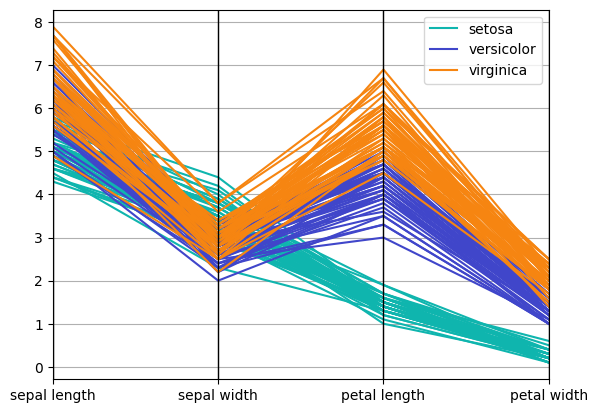

In [6]:
fig = plot_parallel_coordinates(df=df, colors=label_colors)

In [7]:
fig.savefig("iris_pcp.pdf", bbox_inches="tight")

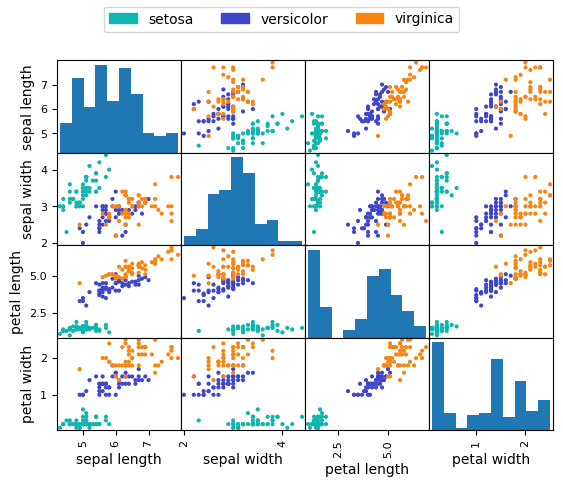

In [7]:
_ =plot_scatter_matrix(df, colors=label_colors)

In [8]:
# prec = compute_and_plot_para_voro_result.copy()

compute samples and labels...
normalize samples...
compute voronoi...
compute aabbox...
compute ridge vertices...


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\single_dataset_convenience_plots\../../..\src\para_voro.py:295: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]
c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\single_dataset_convenience_plots\../../..\src\para_voro.py:334: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


build directed ridge vertices selector matrix...
compute sample points...
compute preparations...
compute directed transition cubes..
compute clustering...
compute label distribution...
plot label distribution...


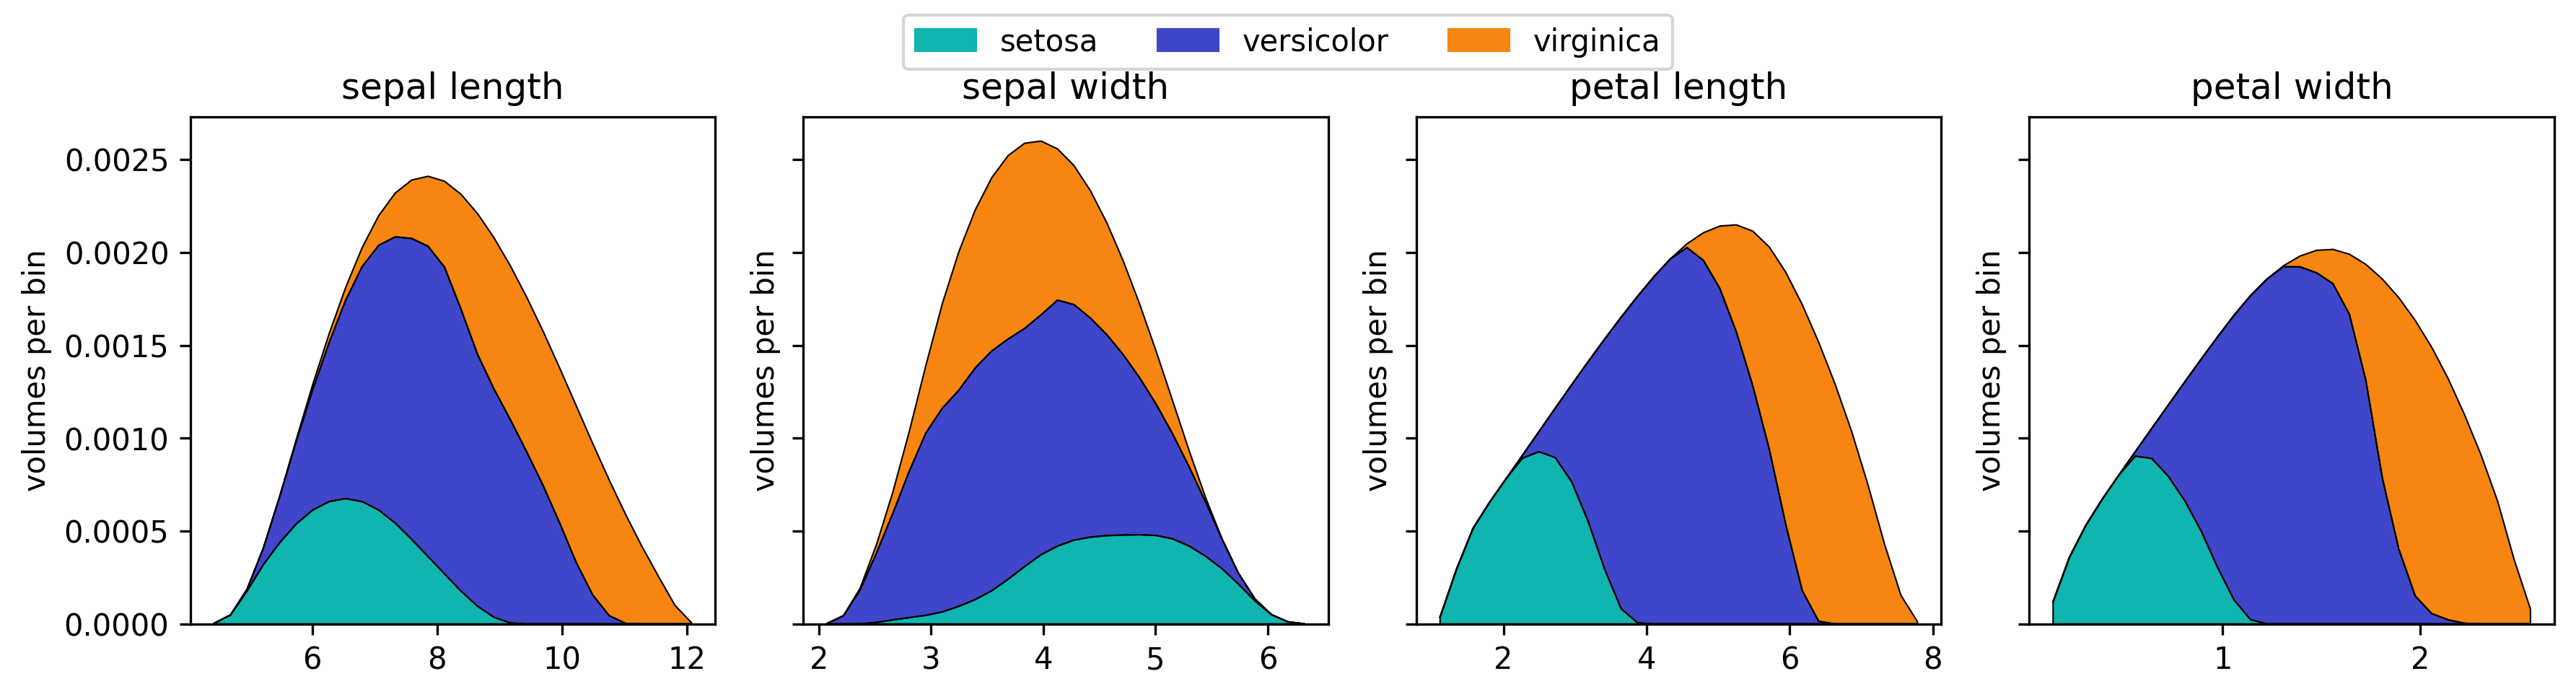

plot ridge volumes


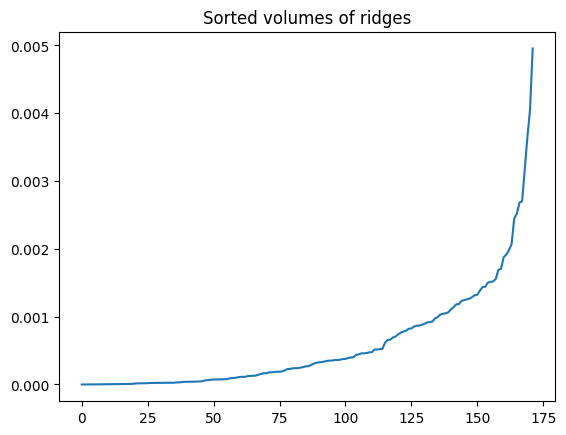

plot sorted clusterings


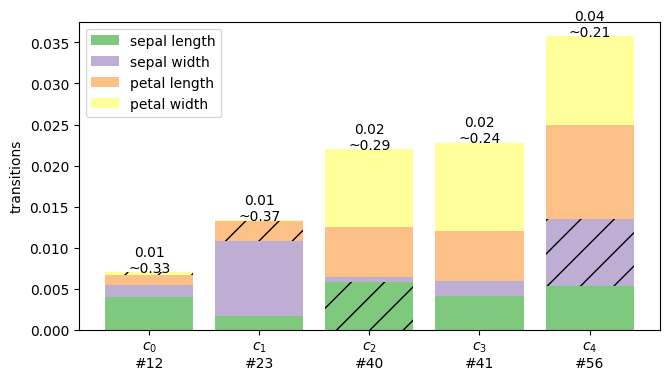

plot pairwise transition matrix...


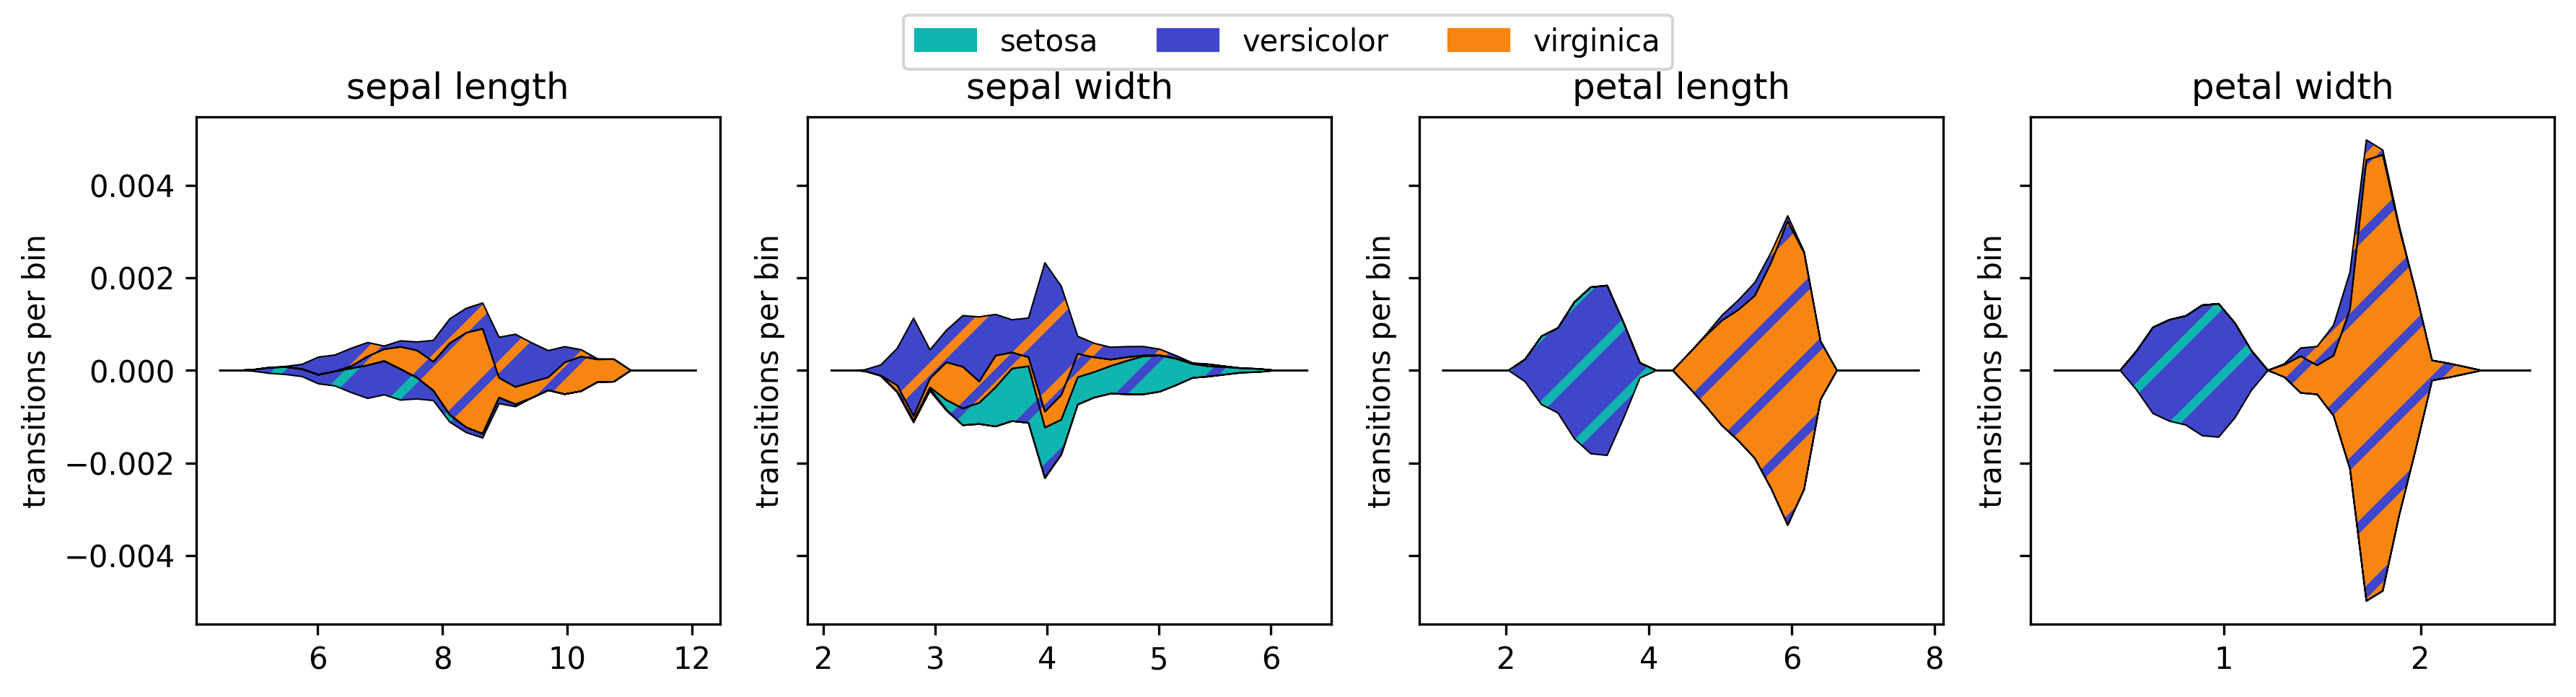

plot in-out transition matrix...


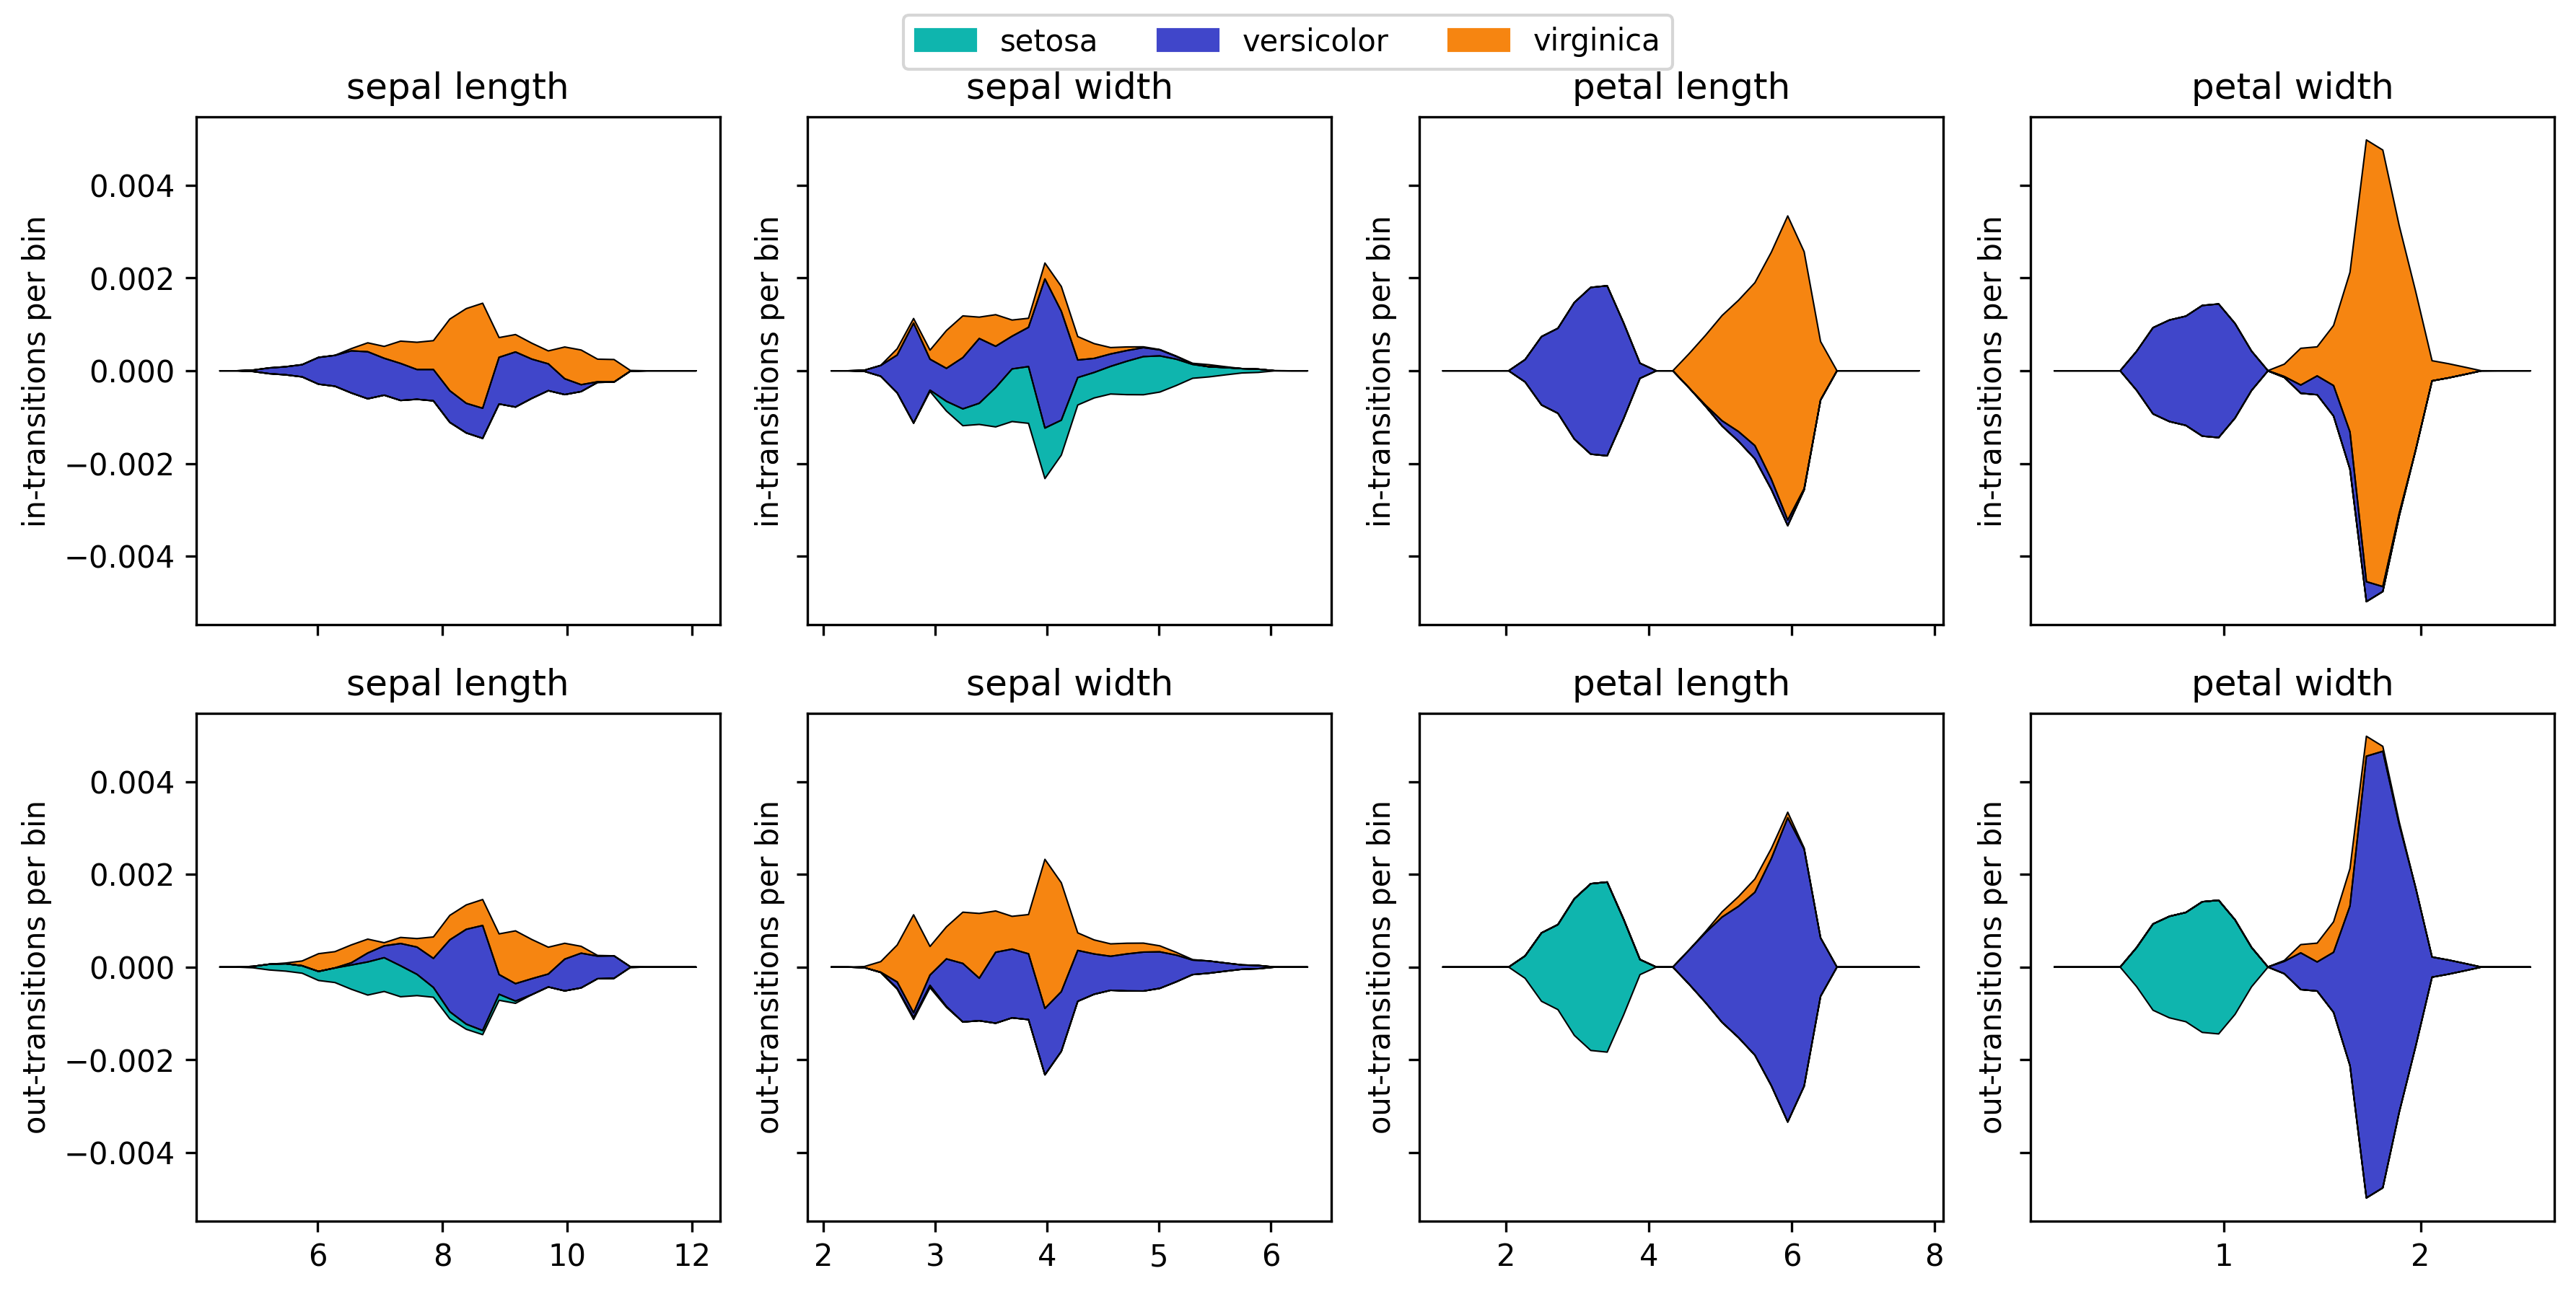

plot global transitions...


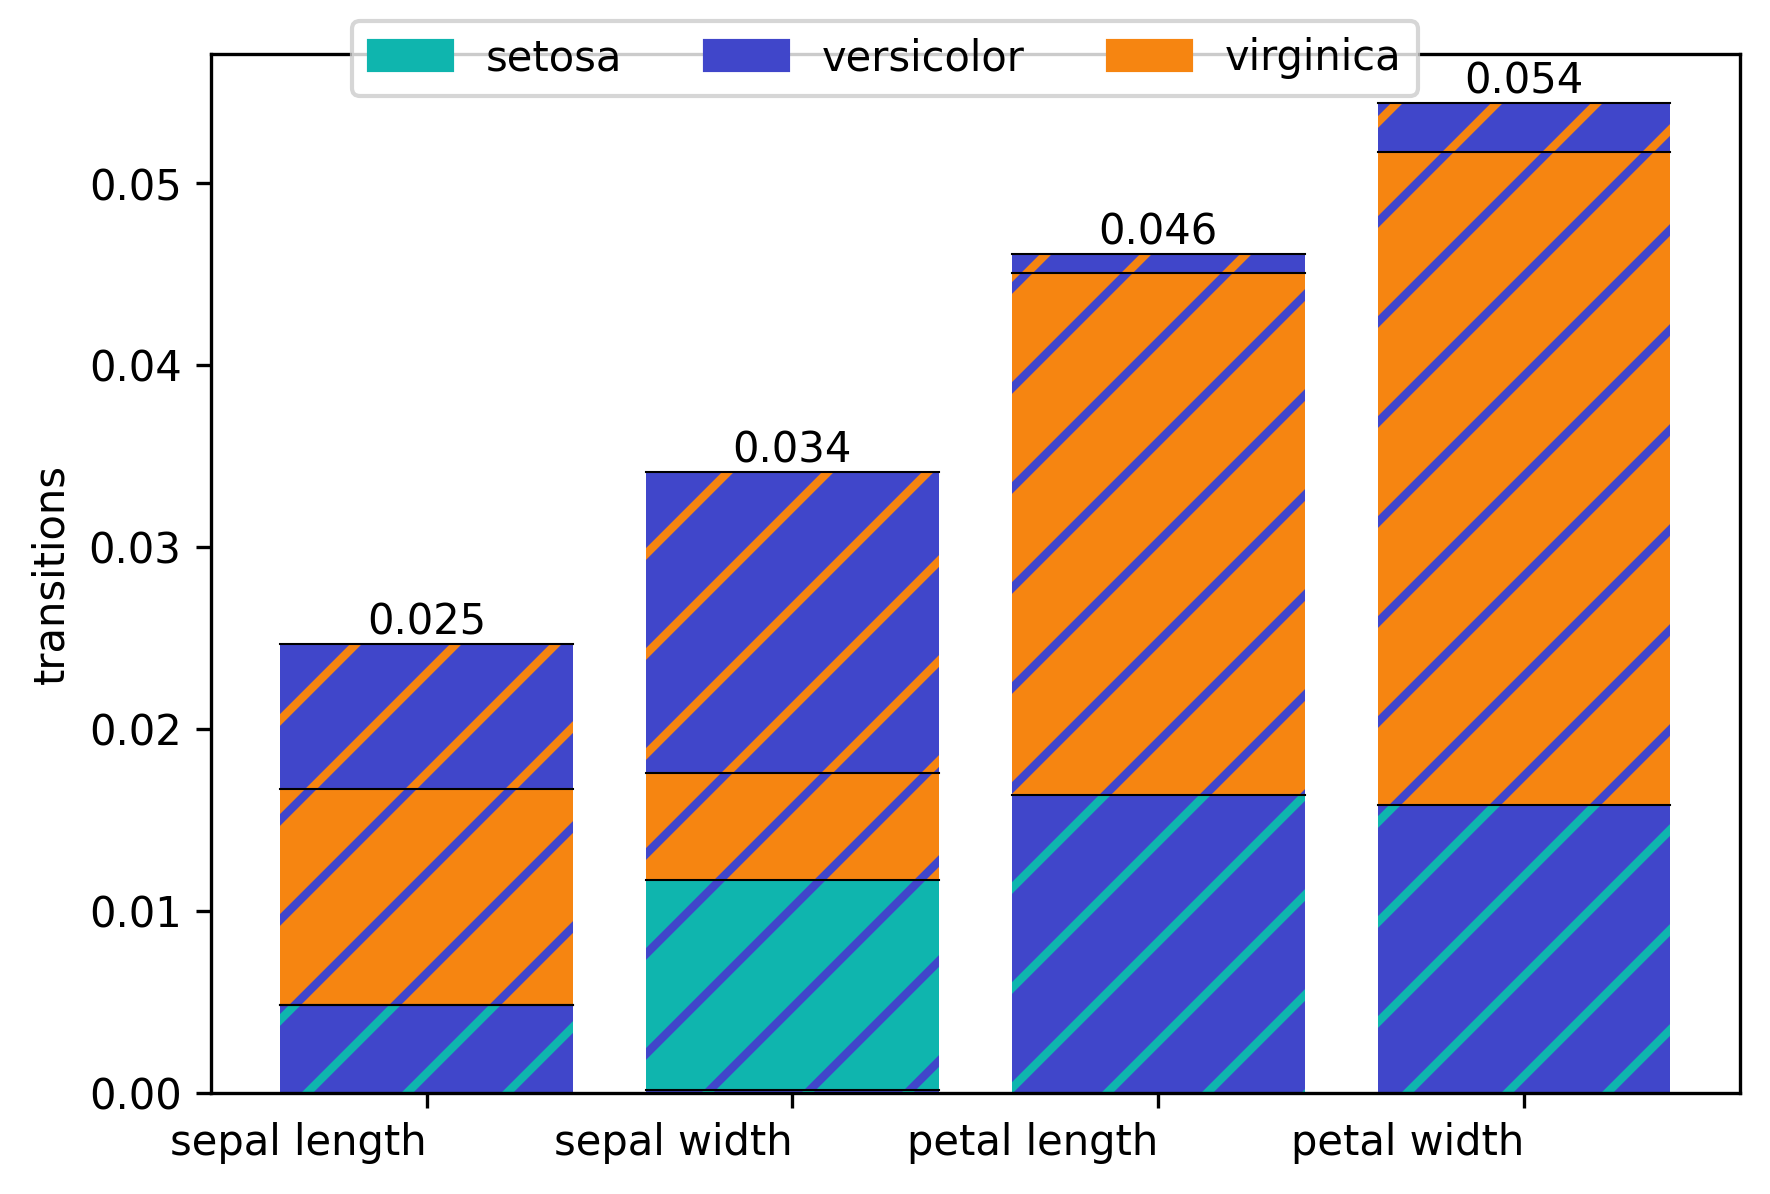

plot transitions and ridges matrix...


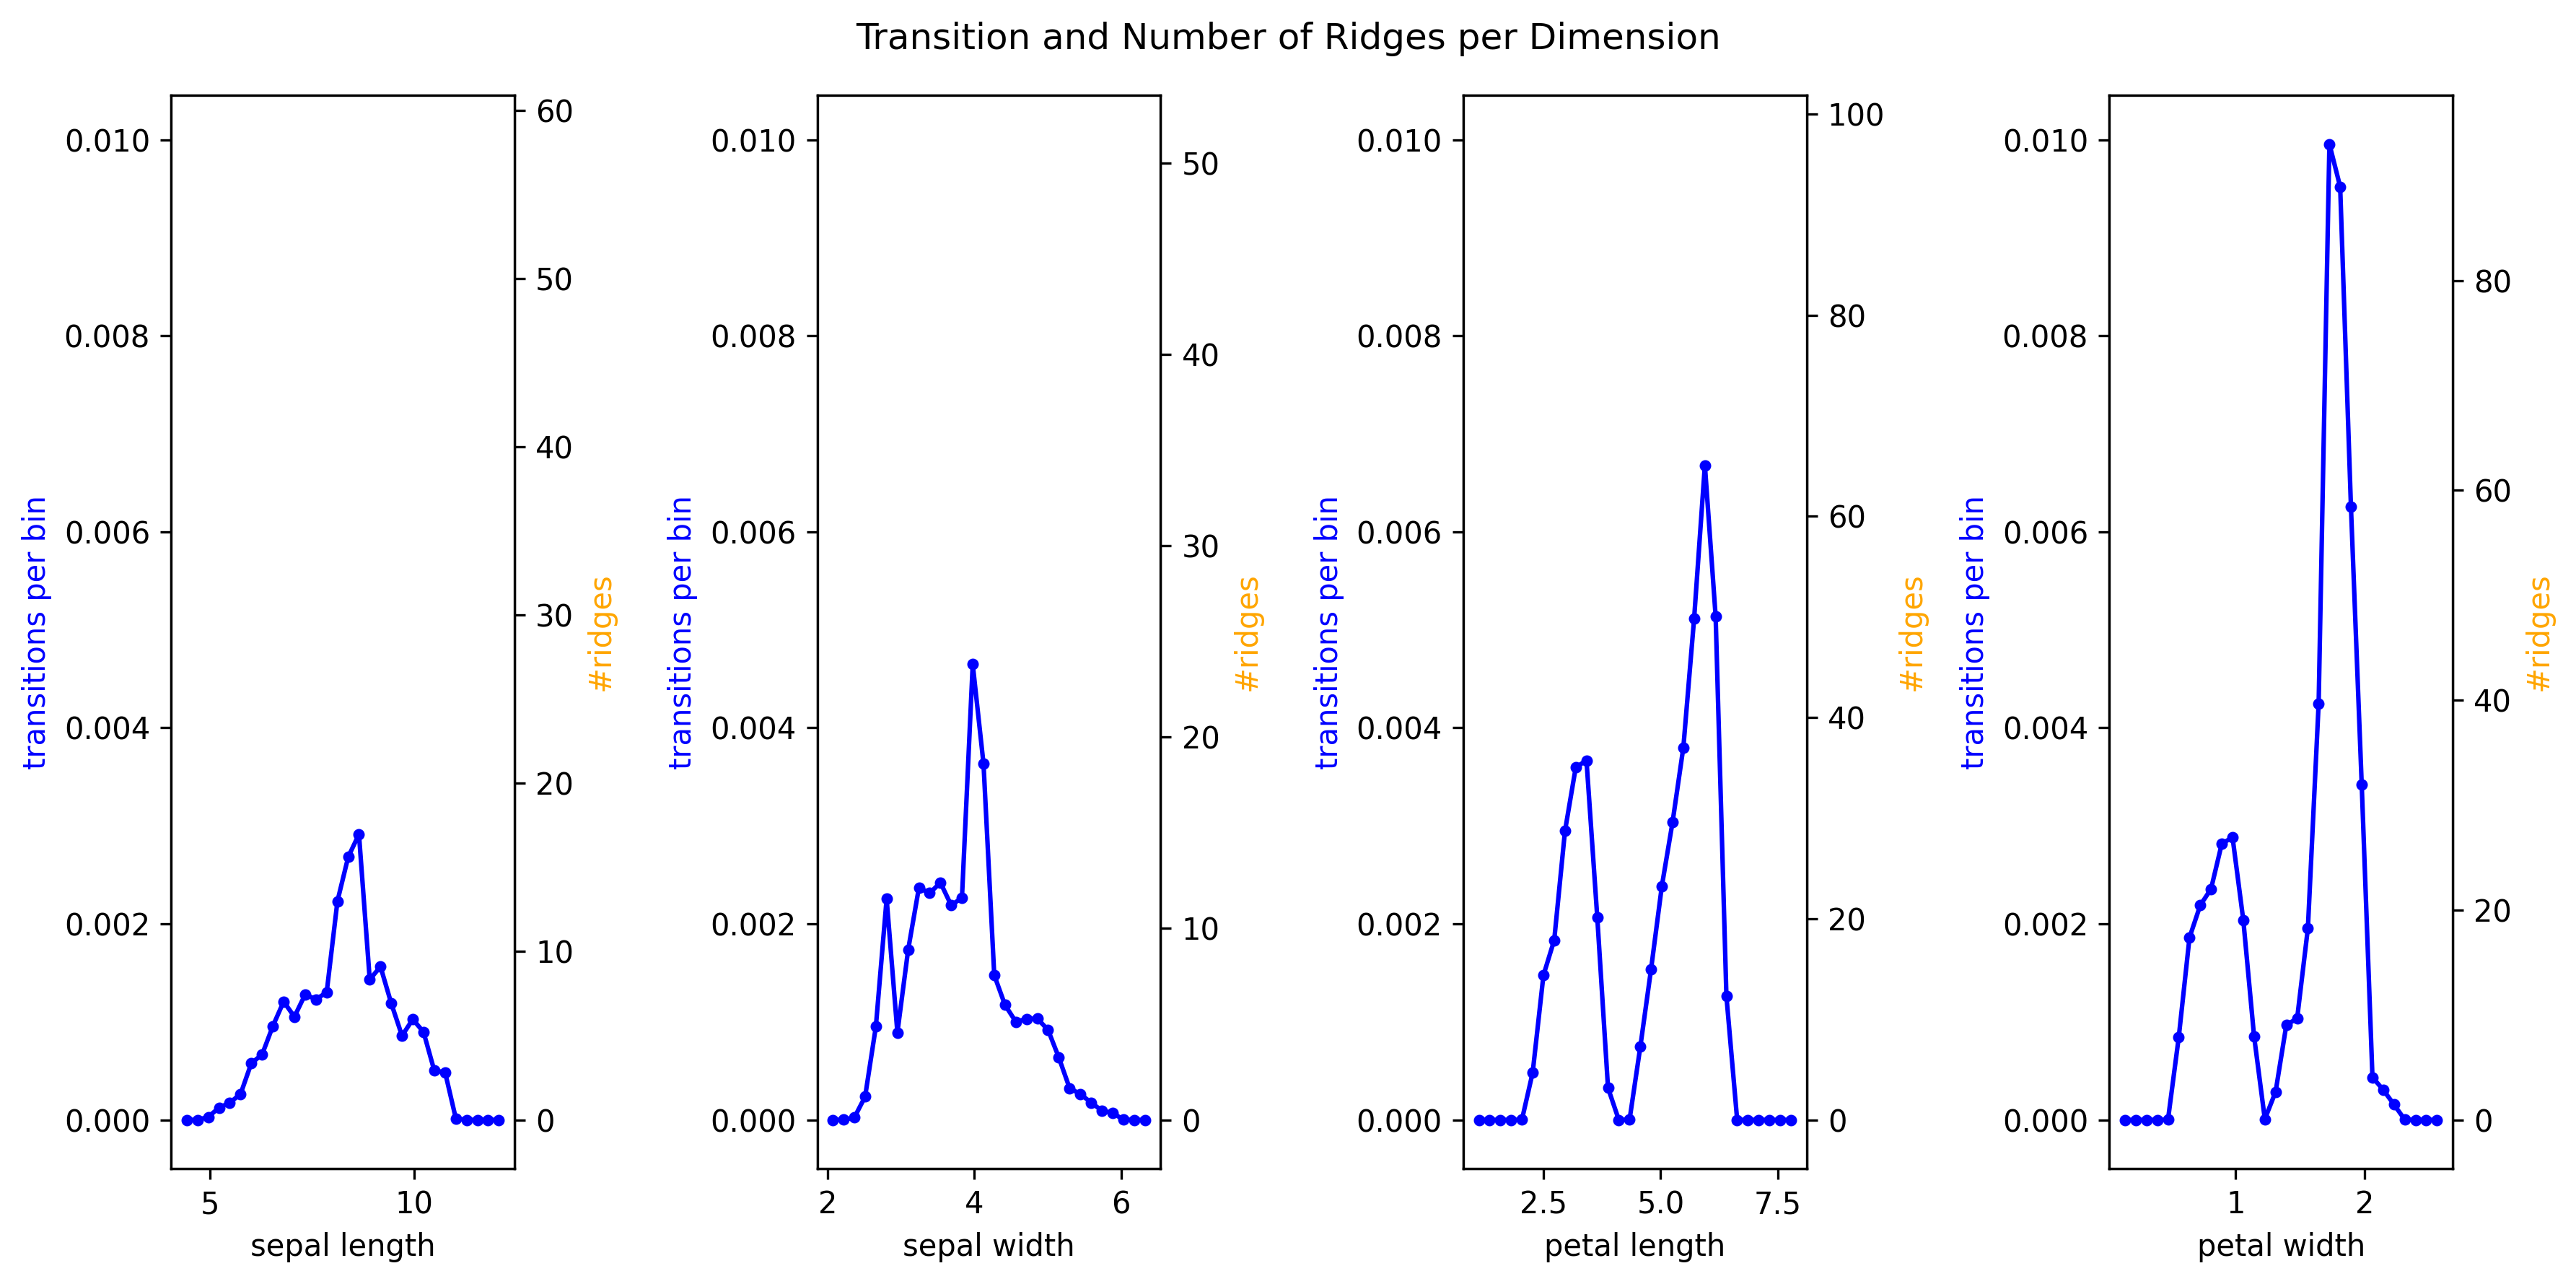

plot normalized label distribution...


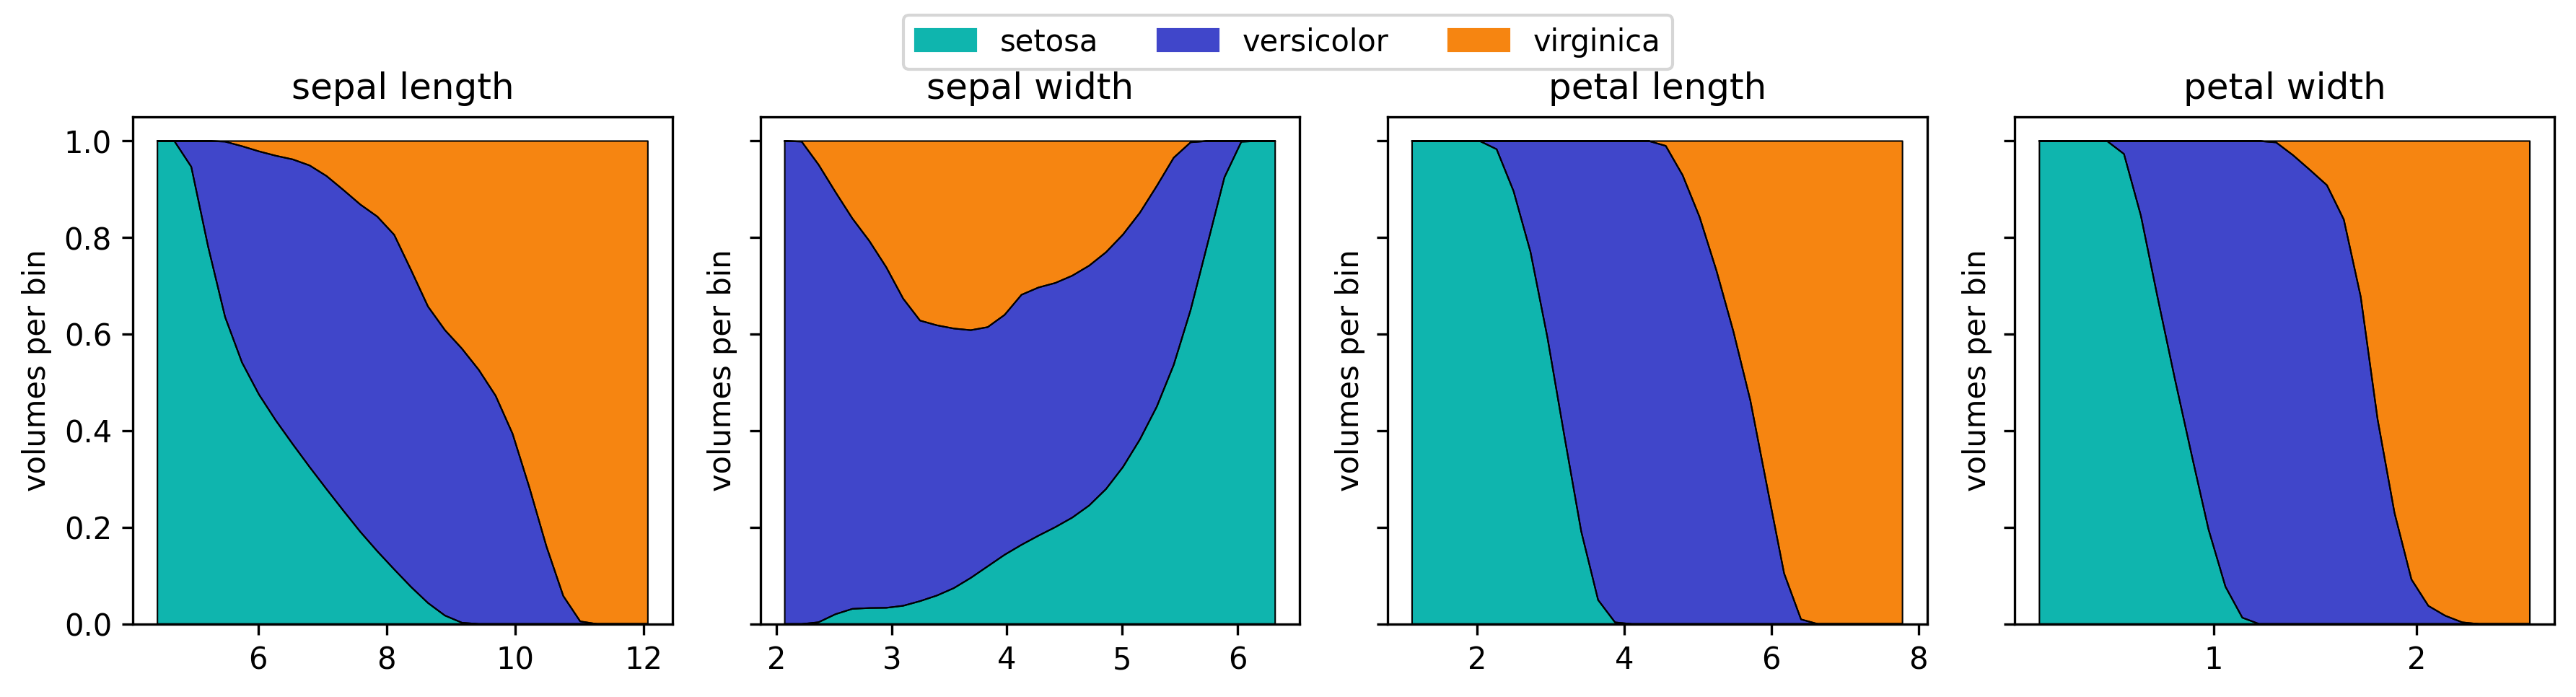

plot normed pairwise transition matrix...


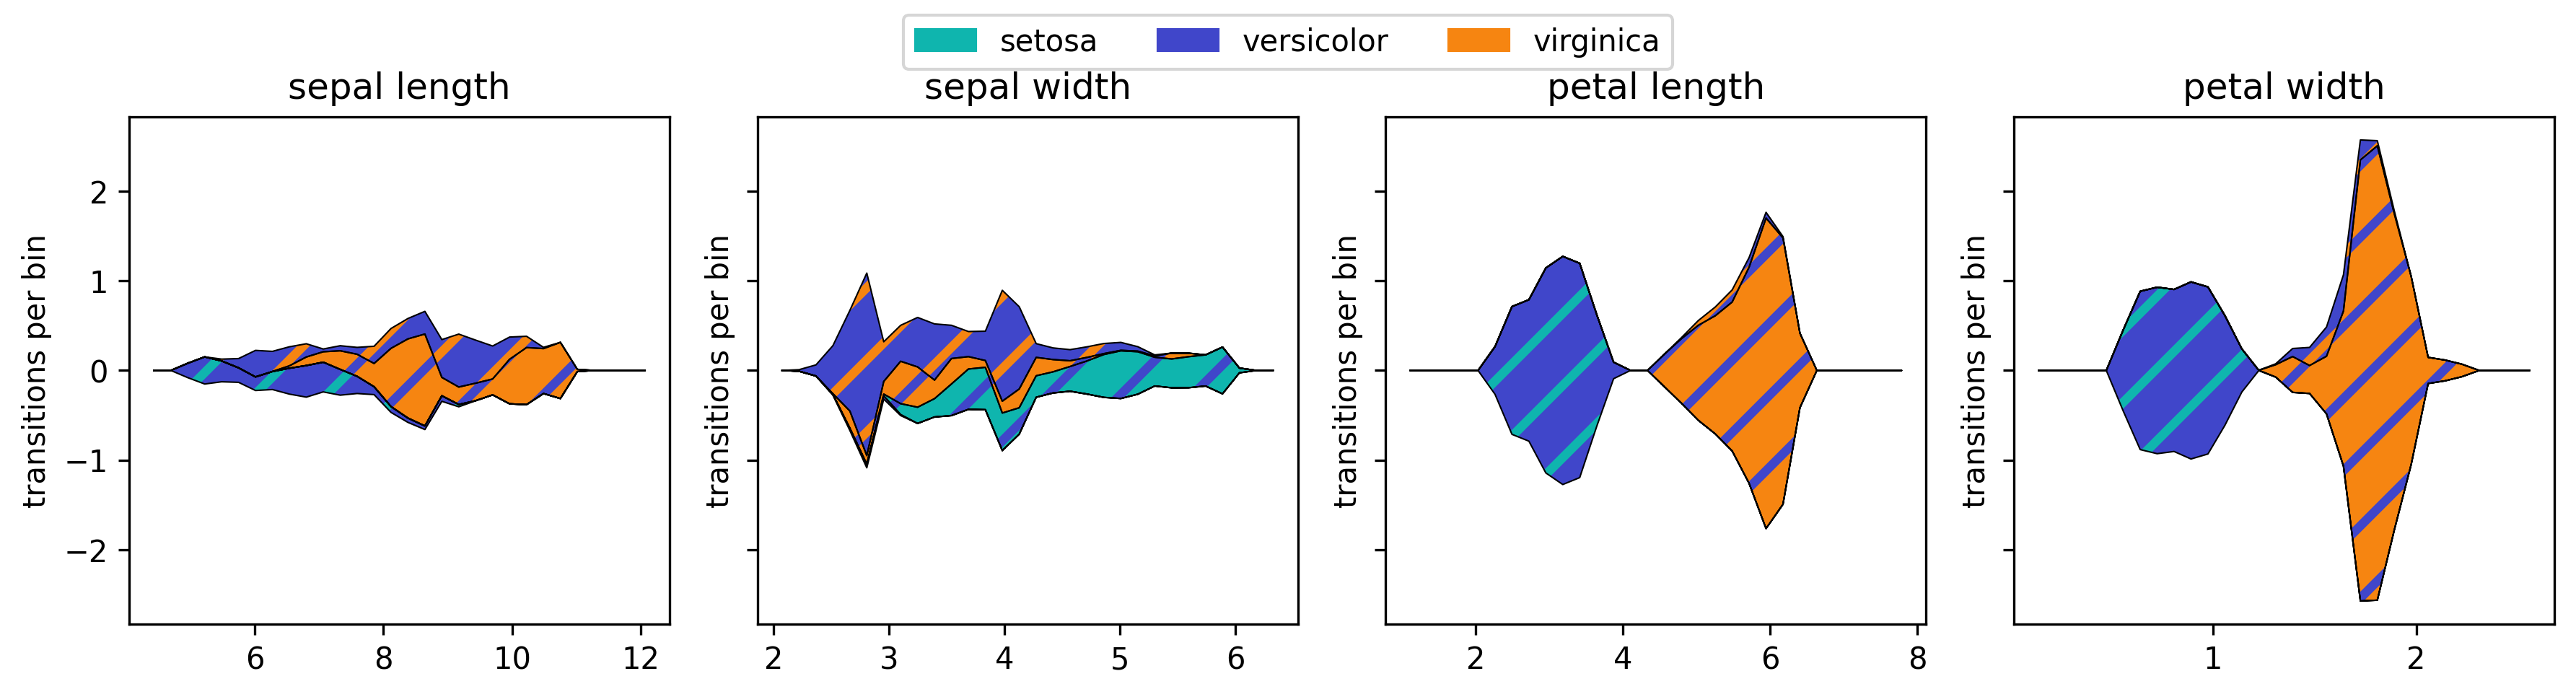

plot normed in-out transition matrix...


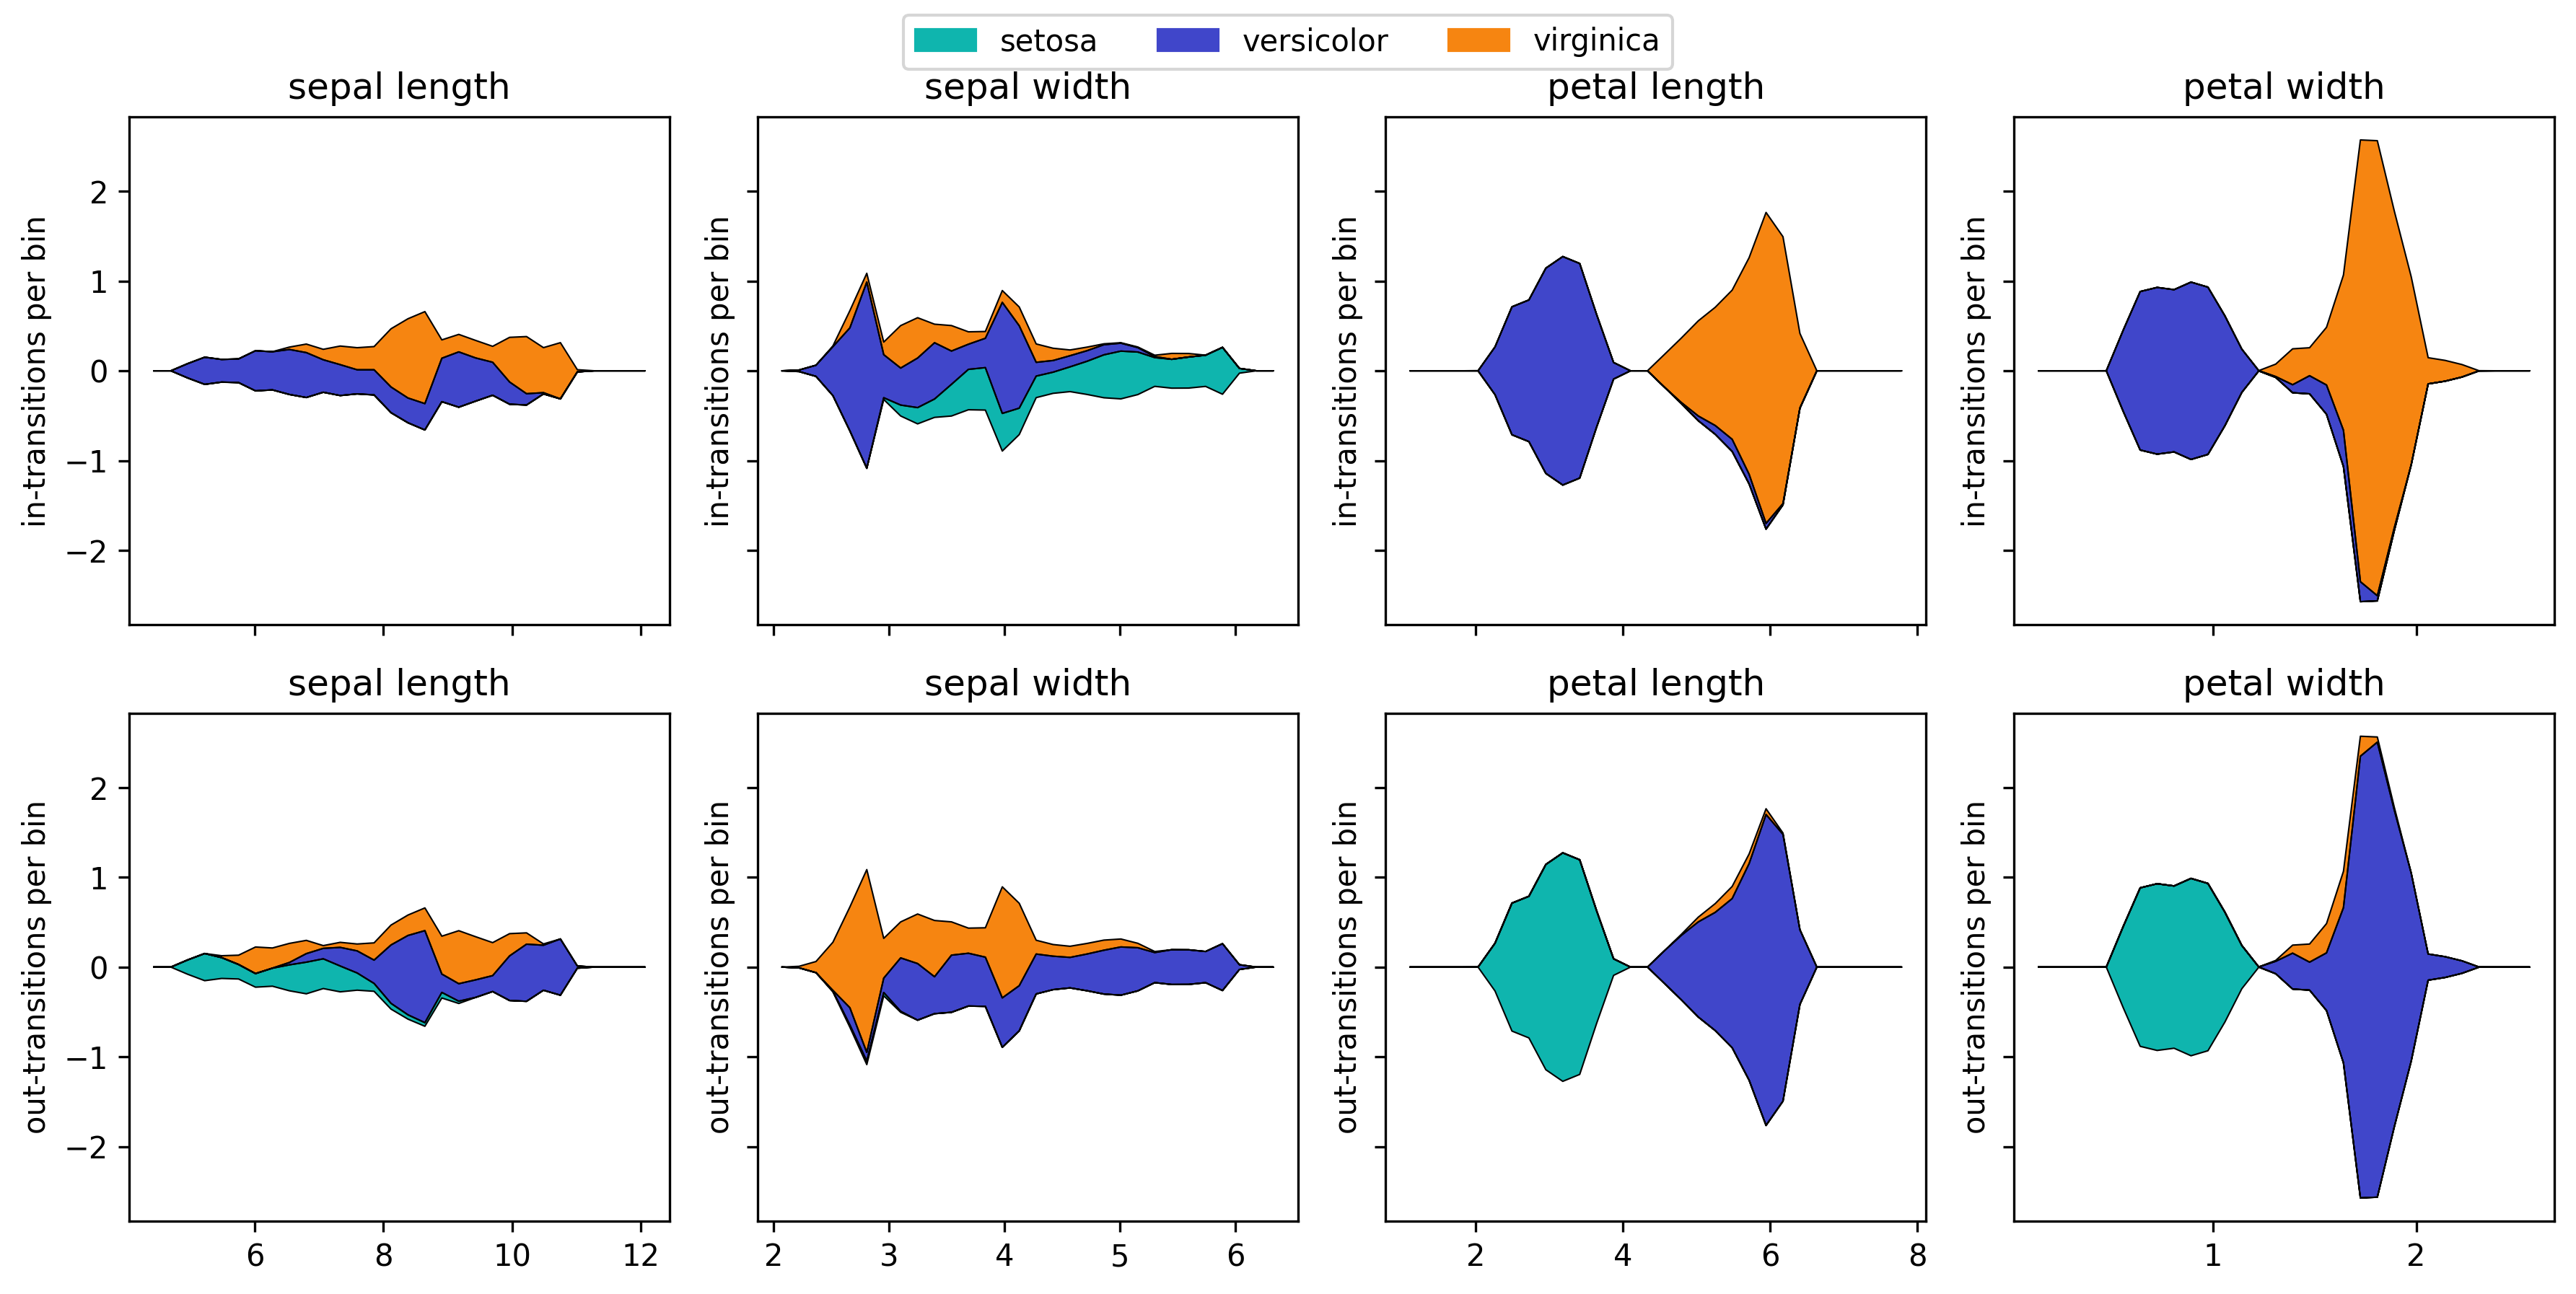

plot normed global transitions...


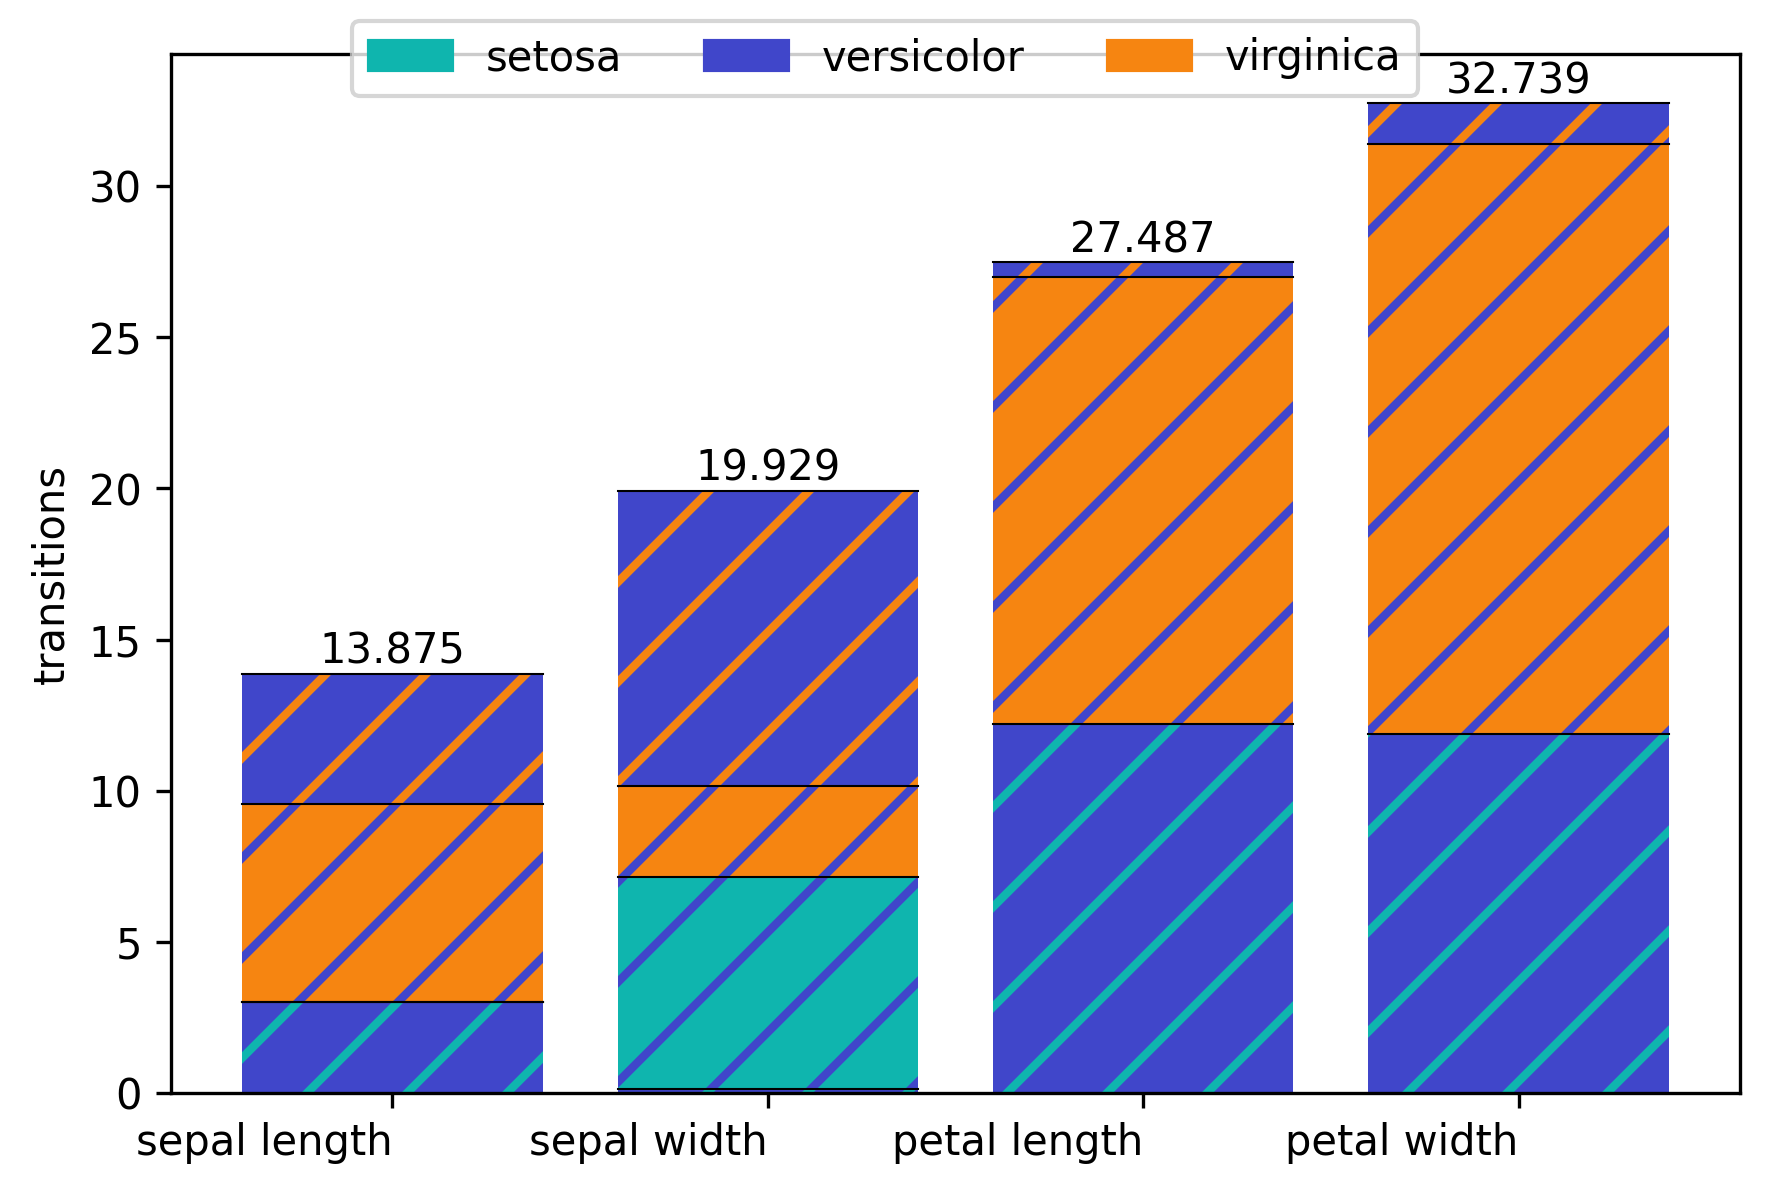

plot normed transitions and ridges matrix...


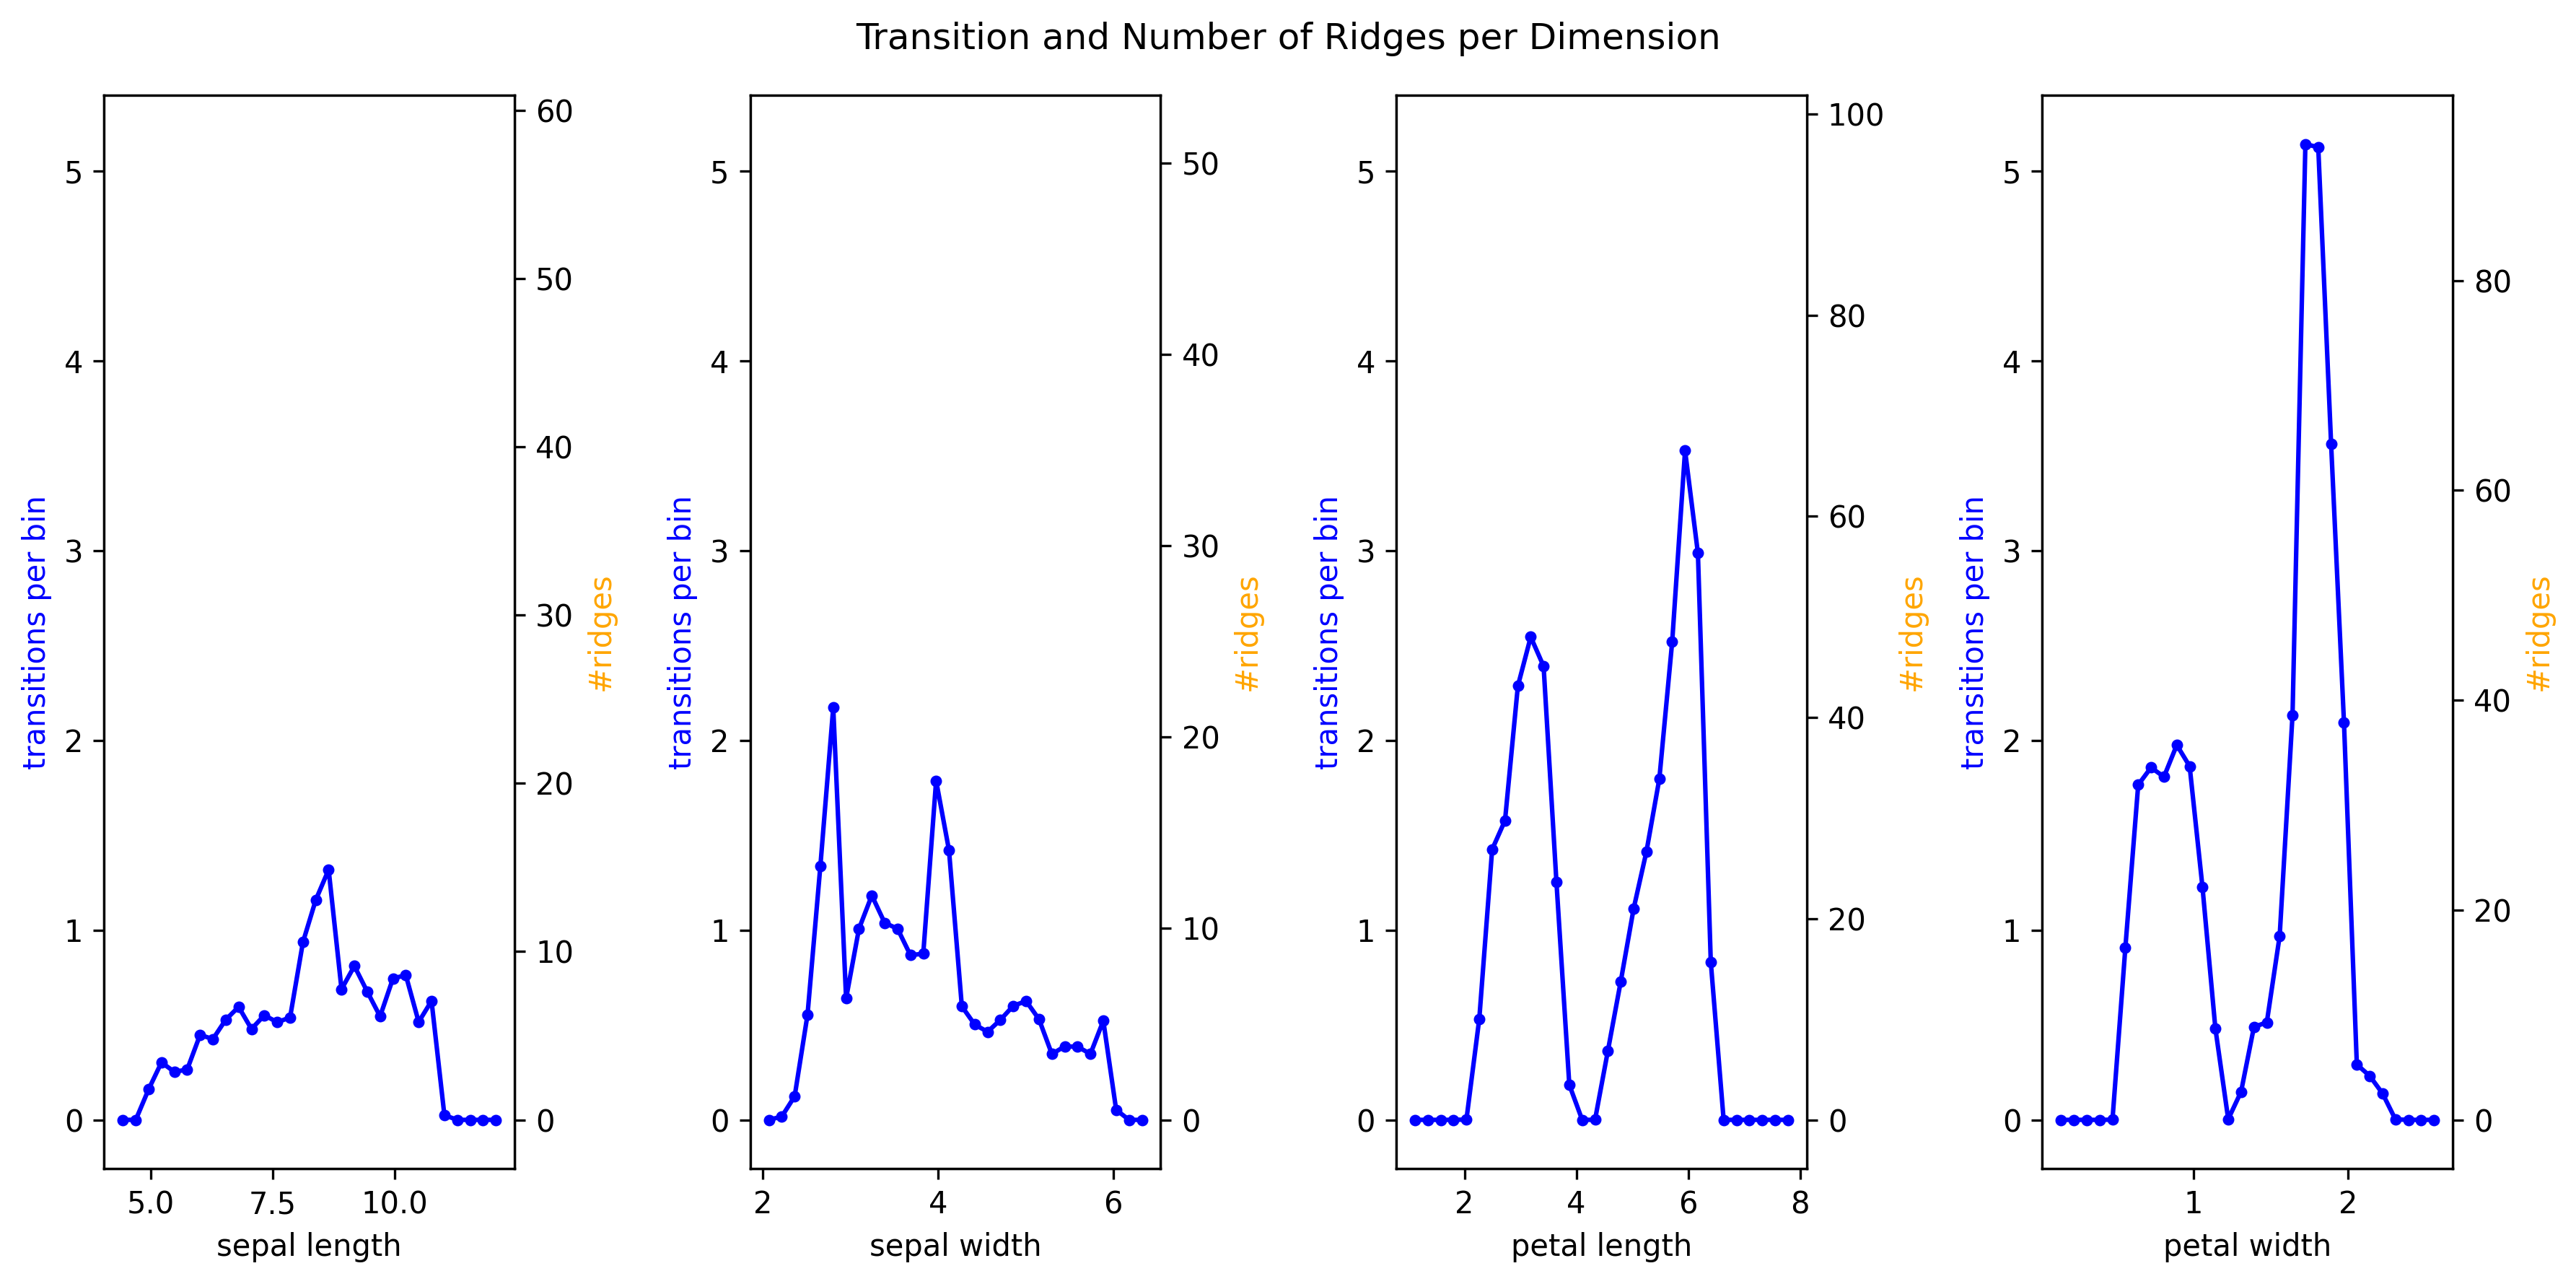

In [10]:
compute_and_plot_para_voro_result = compute_and_plot_para_voro(df, normalize_samples=True, n_samples_per_dim=30, clip_convex_hull=True, label_colors=label_colors,
                           verbose_light=True,
                           normalize_by_bandwidth=False,
                           plot_label_distr_list_kwargs=dict(share_y_axis=True, title=None, legend_kwargs=dict(loc="upper center"), fig_kwargs=dict(figsize=(12 * 1., 3 * 1.08))),
                           plot_sens_matrix_list_kwargs=dict(share_y_axis=True, stackplot_hatch_linewidth=3, 
                                                             stack_plot_kwargs=dict(baseline="sym", hatch="/", colors=label_colors),
                                                             title="", legend_kwargs=dict(ncol=3, loc="upper center"), fig_kwargs=dict(figsize=(12 * 1., 3 * 1.08))),
                           plot_sensitivities_kwargs=dict(share_y_axis=True),
                           plot_aggregated_input_output_transitions_kwargs=dict(share_y_axis=True, title="", legend_kwargs=dict(ncol=3, loc="upper center")),
                           plot_global_param_transitions_by_pair_kwargs=dict(fig_kwargs=dict(figsize=(6, 4)), hatch_line_width=2, hatch="/", x_axis_ticks_rotation="horizontal", plot_legend=True, 
                                                                             legend_kwargs=dict(ncol=3, loc="upper center"),
                                                                             title=""),
                           plot_clustered_normals_as_bar_chart_kwargs=dict(title=""),
                           save_fig_prefix="iris_", save_figs=True, precomputed_=None)


In [ ]:
compute_and_plot_para_voro_result.keys()

dict_keys(['label_names', 'dim_labels', 'dim_colors', 'vor', 'generate_geometric_segment_boundaries_via_voronoi_result', 'M_T', 'sample_points_min_max', 'ridge_based_para_sense_preparations_result', 'build_directed_transition_cubes_result', 'compute_clustered_normals_result', 'compute_label_distribution_result'])

In [ ]:
D_i_s = compute_and_plot_para_voro_result["compute_label_distribution_result"][0]

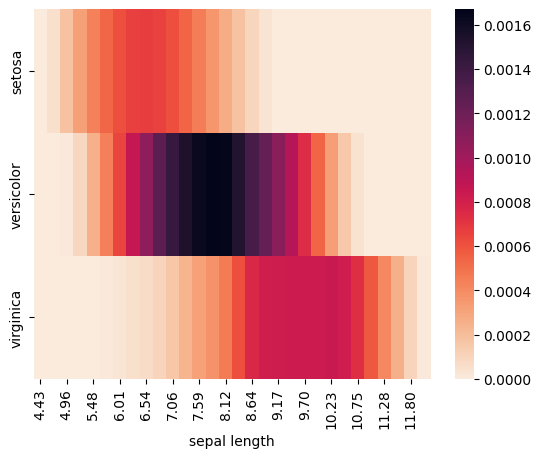

In [ ]:
d_0 = pd.DataFrame(data=D_i_s[0].T, index=np.unique(df.iloc[:, -1]), columns=[f"{s:.2f}" for s in compute_and_plot_para_voro_result["sample_points_min_max"][0][0] * df.iloc[:, 0].max() + df.iloc[:, 0].min()])
ax = sns.heatmap(d_0, cmap=sns.cm.rocket_r)
ax.set_xlabel(df.columns[0])
f = ax.get_figure()
f.savefig("example_heatmap_iris_x1_distr.pdf")

In [ ]:
rec_sample_points = compute_and_plot_para_voro_result["sample_points_min_max"][0][0] * df.iloc[:, 0].max() + df.iloc[:, 0].min()

In [ ]:
rec_sample_points

array([ 4.43166667,  4.695     ,  4.95833333,  5.22166667,  5.485     ,
        5.74833333,  6.01166667,  6.275     ,  6.53833333,  6.80166667,
        7.065     ,  7.32833333,  7.59166667,  7.855     ,  8.11833333,
        8.38166667,  8.645     ,  8.90833333,  9.17166667,  9.435     ,
        9.69833333,  9.96166667, 10.225     , 10.48833333, 10.75166667,
       11.015     , 11.27833333, 11.54166667, 11.805     , 12.06833333])

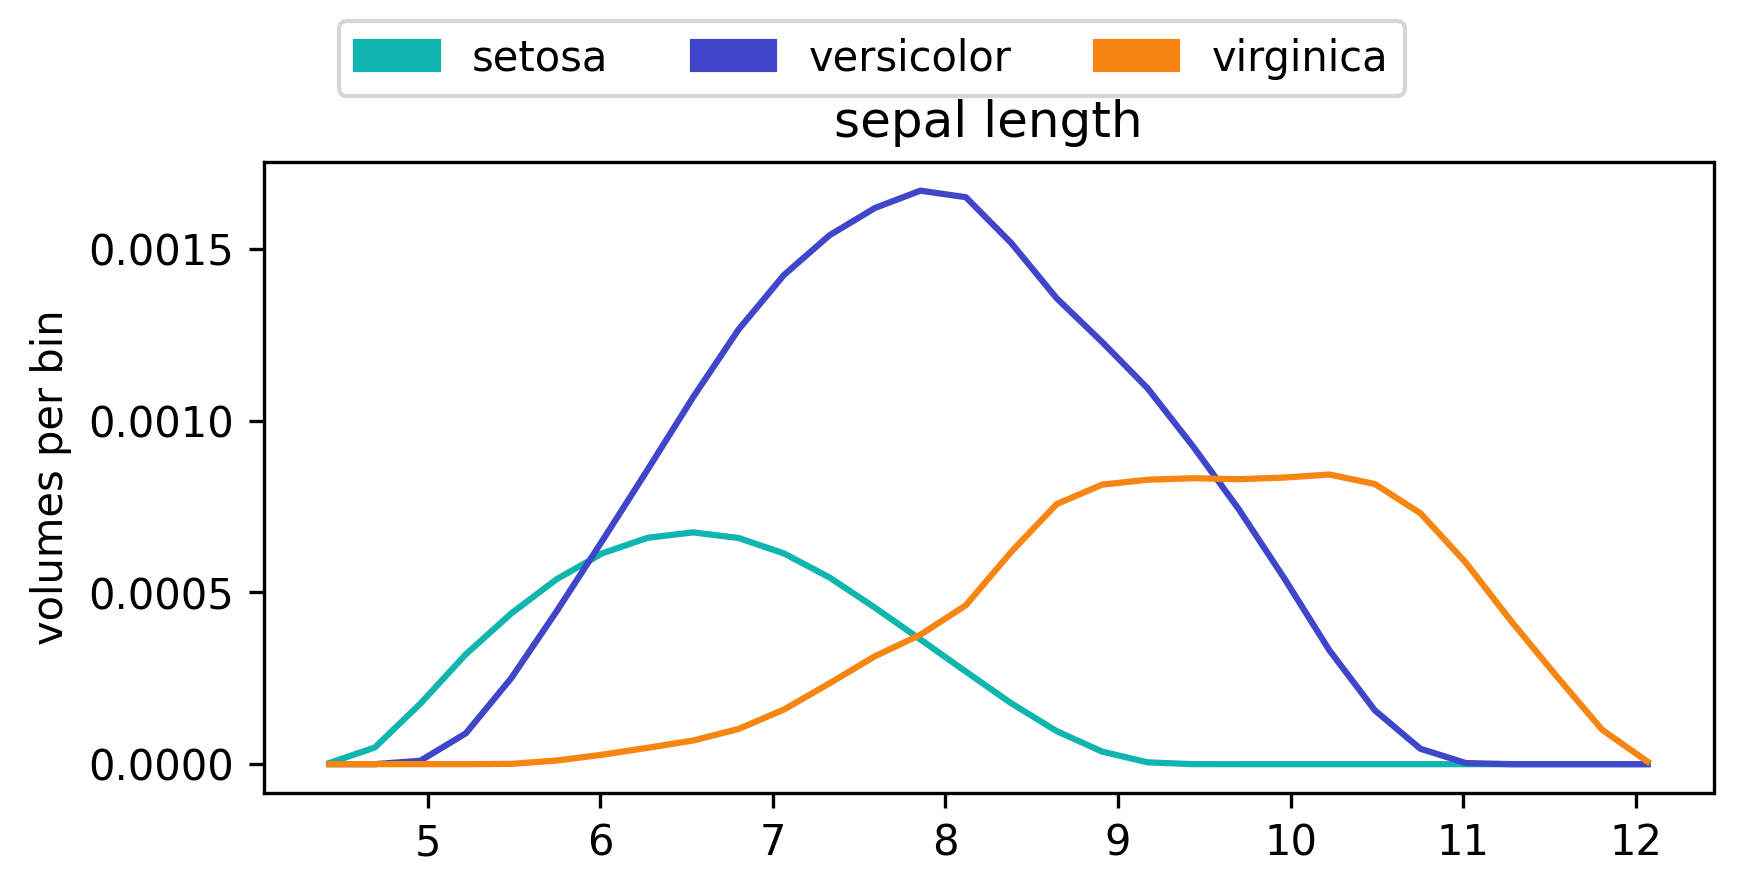

In [ ]:
f = plot_label_distribution_matrix_list([rec_sample_points], [D_i_s[0]], stack_plot=False, stack_plot_kwargs=dict(colors=label_colors), line_labels=np.unique(df.iloc[:, -1]), dim_labels=[df.columns[0]], legend_kwargs=dict(ncol=3, loc="upper center"), title="")
f.gca().set_title("")
f.gca().set_xlabel(df.columns[0])
f.savefig("example_lineplot_iris_x1_distr.pdf", bbox_inches="tight")

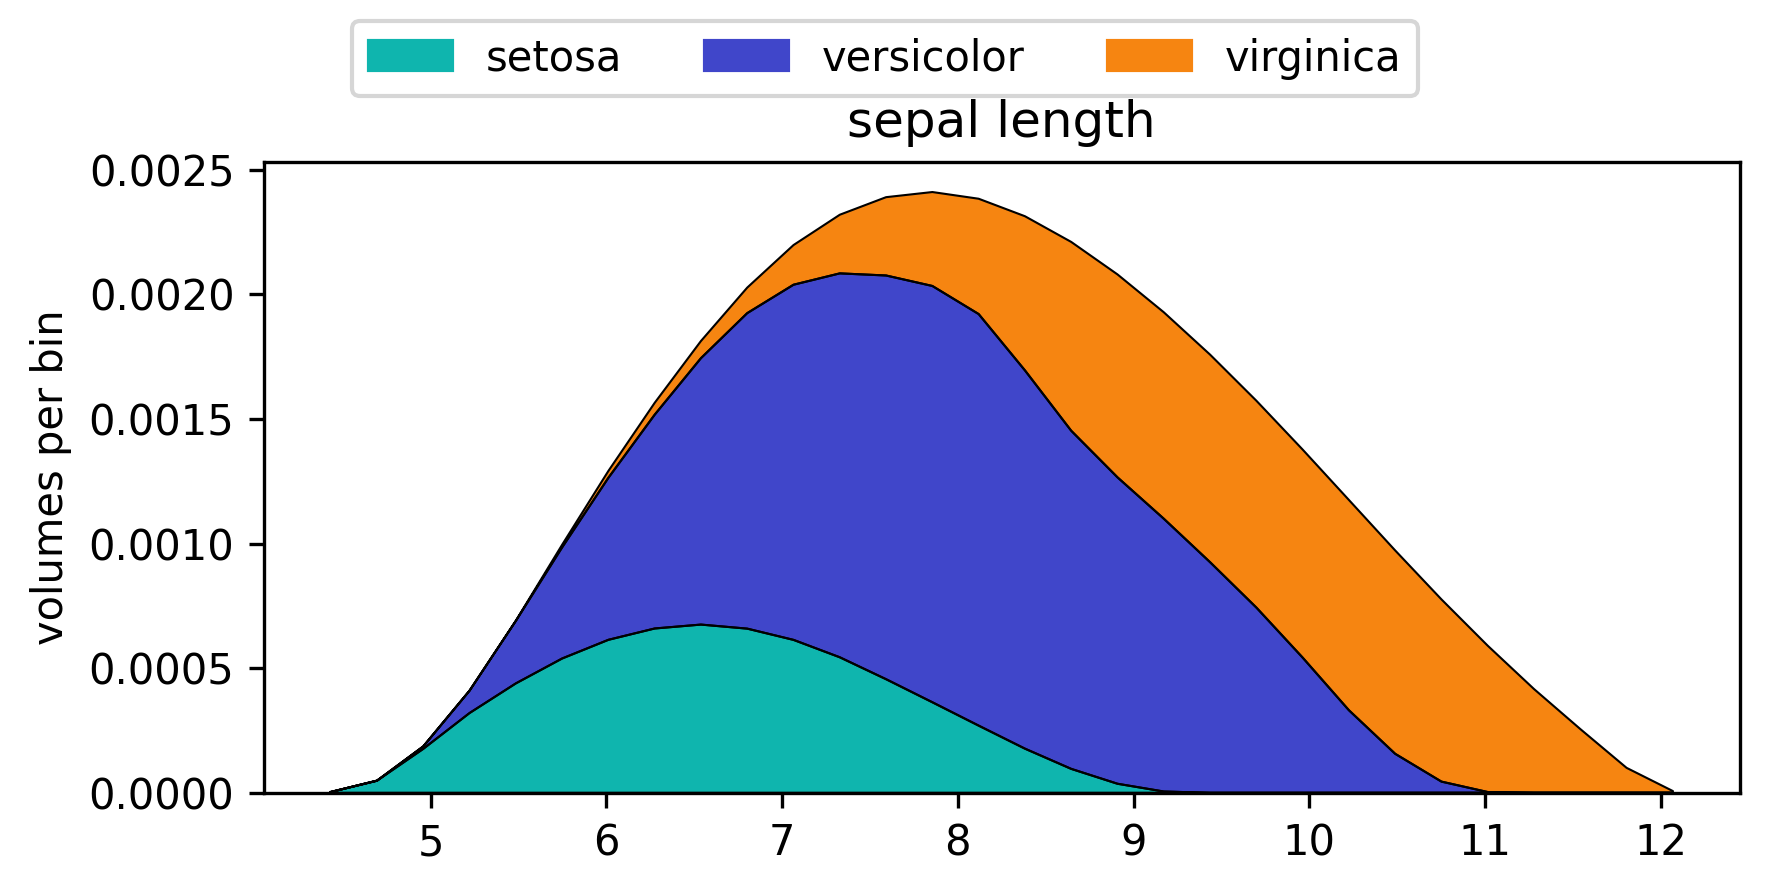

In [ ]:
f = plot_label_distribution_matrix_list([rec_sample_points], [D_i_s[0]], stack_plot=True, 
                                        stack_plot_kwargs=dict(colors=label_colors, baseline="zero"), 
                                        line_labels=np.unique(df.iloc[:, -1]), 
                                        dim_labels=[df.columns[0]], 
                                        legend_kwargs=dict(ncol=3, loc="upper center"), title="", stackplot_divider=True)
f.gca().set_title("")
f.gca().set_xlabel(df.columns[0])
f.savefig("example_stackplot_iris_x1_distr.pdf", bbox_inches="tight")

In [ ]:
_plot_sens_matrix_list_kwargs = dict(
        do_pairwise_labels=False, stackplot_fill=0, stackplot_color_hatch=True, 
        stack_plot_kwargs=dict(baseline="sym", hatch="/", colors=label_colors), 
        stack_plot_gradient=False, horizontal_plot=True, stack_plot_outline=False, discrete_dimension_ticks_and_labels_kwargs=dict(rotation="vertical"),
        share_y_axis=True, stackplot_divider=True, fig_kwargs=dict(dpi=300), stackplot_hatch_linewidth=3,
        dim_labels=df.columns.copy()[:-1], line_labels=np.unique(df.iloc[:, -1])
    )

In [ ]:
_plot_sens_matrix_list_kwargs

{'do_pairwise_labels': False,
 'stackplot_fill': 0,
 'stackplot_color_hatch': True,
 'stack_plot_kwargs': {'baseline': 'sym',
  'hatch': '/',
  'colors': array(['#0fb5ae', '#4046ca', '#f68511', '#de3d82', '#7e84fa', '#72e06a',
         '#e8c600', '#7326d3', '#147af3', '#cb5d00', '#008f5d', '#bce931'],
        dtype=object)},
 'stack_plot_gradient': False,
 'horizontal_plot': True,
 'stack_plot_outline': False,
 'discrete_dimension_ticks_and_labels_kwargs': {'rotation': 'vertical'},
 'share_y_axis': True,
 'stackplot_divider': True,
 'fig_kwargs': {'dpi': 300},
 'stackplot_hatch_linewidth': 3,
 'dim_labels': Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object'),
 'line_labels': array(['setosa', 'versicolor', 'virginica'], dtype=object)}

In [ ]:
compute_and_plot_para_voro_result.keys()

dict_keys(['label_names', 'dim_labels', 'dim_colors', 'vor', 'generate_geometric_segment_boundaries_via_voronoi_result', 'M_T', 'sample_points_min_max', 'ridge_based_para_sense_preparations_result', 'build_directed_transition_cubes_result', 'compute_clustered_normals_result', 'compute_label_distribution_result'])

In [ ]:
_, dtc_ret = compute_and_plot_para_voro_result["build_directed_transition_cubes_result"]

In [ ]:
sens_matrix_list = [d[0] for d in dtc_ret]

In [ ]:
sample_points = compute_and_plot_para_voro_result["sample_points_min_max"][0]

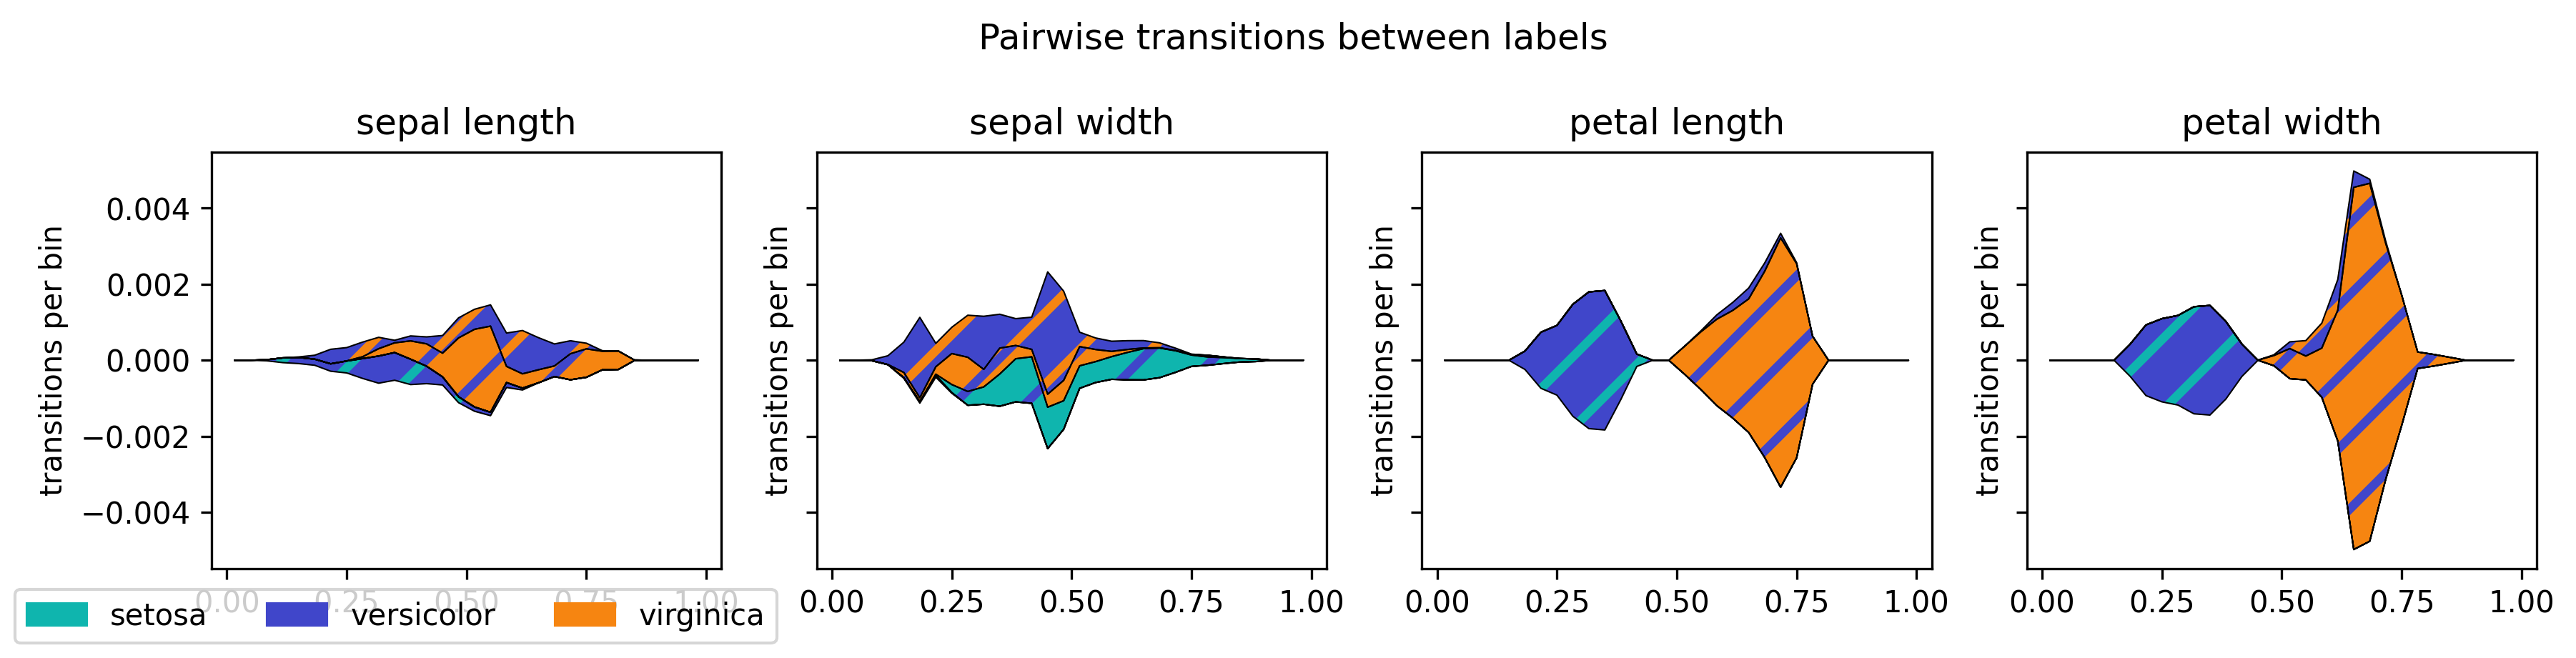

In [ ]:
f = plot_sens_matrix_list(sample_points=sample_points, sens_matrix_list=sens_matrix_list, **_plot_sens_matrix_list_kwargs)